In [73]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

##### Загрузка и подготовка даных

In [2]:
data_dict = load_digits()
print(data_dict.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


Поскольку мы будем использовать алгоритм логистической регрессии, то воспользуемся 'data', а не 'images'.В этом случае,объекты уже находятся в одномерных матрицах размером 1х64, а не 8х8. Второй случай представления матриц будет полезен позже, при использовании сверточных нейросетей.

In [5]:
data = data_dict['data']
print('Размреность датасета:', data.shape)

Размреность датасета: (1797, 64)


In [6]:
binary_targets = (data_dict['target']==5).astype('int')
binary_targets = np.expand_dims(binary_targets, axis = -1)
print('Размреность таргета:', binary_targets.shape)
print(binary_targets[:3])

Размреность таргета: (1797, 1)
[[0]
 [0]
 [0]]


In [7]:
SPLIT_THRESHOLD = 0.8

In [8]:
X_train = data[:int(SPLIT_THRESHOLD * len(data))]
y_train = binary_targets[:int(SPLIT_THRESHOLD * len(data))]

X_test = data[int(SPLIT_THRESHOLD * len(data)):]
y_test = binary_targets[int(SPLIT_THRESHOLD * len(data)):]

В данном примере объекты в матрице Х расположены построчно, в отличии от постолбцового представления в курсе лекций от Andrew Ng.

![title](https://raw.githubusercontent.com/Gooogr/Handmade_ML/master/img/binary_logistic_regression.png)

### Определение функций алгоритма

**Вспомогательные функции**

In [9]:
def sigma(z):
    '''Return sigma function result
    '''
    return(1/(1 + np.power(np.exp(1), -z)))

In [10]:
# Sanity check
assert sigma(0)==0.5
assert sigma(np.inf) == 1
assert sigma(-np.inf) == 0

**Основные функции**

In [40]:
def weights_initialization(X):
    ''' Initialize parameters W and b
    '''
    b = 0
    W = np.zeros([1, X.shape[1]])
    return W, b

In [41]:
def train(X, y, lr, W, b):
    '''
    Input:
        X - training data
        y - target labels
        lr - learning rates
        W, b - weights
    Outputs:
        W, b -  weights after train iteration
    '''
    m = X.shape[0] #training objects amount
    
    # forward pass
    Z = np.dot(W, X.T) + b
    A = sigma(Z)
    
    # backward pass
    dZ = A - y.T
    dW = (1 / m) * np.dot(X.T, dZ.T)
    db = (1 / m) * np.sum(dZ)
    
    # update weights
    W -= lr * dW.T
    b -= lr*db
    
    return W, b

In [42]:
def predict(X, W, b):
    Z = np.dot(W, X.T) + b
    A = sigma(Z)
    return A.T

In [43]:
def make_logreg(X_train, y, X_test, lr, epochs):
    W, b = weights_initialization(X_train)
    for step in range(epochs):
        W, b = train(X_train, y, lr, W, b)
    return predict(X_test, W, b)

### Результаты

In [44]:
y_pred = make_logreg(X_train = X_train, y = y_train, X_test = X_test, lr = 0.01, epochs = 100)

In [45]:
y_pred_rank = y_pred > 0.5

In [46]:
accuracy = 1 - np.sum(np.abs(y_pred_rank - y_test))/len(y_pred_rank )
print(accuracy)

0.9916666666666667


In [47]:
error_idxs = np.where((y_pred_rank - y_test) != 0)[0]
error_idxs

array([180, 225, 328])

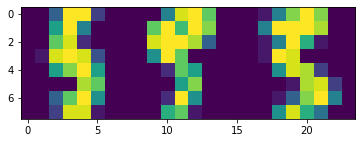

In [48]:
error_objects = X_test[error_idxs].reshape((-1,8,8))
result_img = []
for img in error_objects:
    result_img.append(img)
plt.imshow(np.hstack(result_img))
plt.show()

In [49]:
data_dict['target'][len(y_train) + error_idxs]

array([5, 9, 3])

Алгоритм выдал 1 false positive и 2 false negative ошибки